# Data Smart Sans Excel

[Table of Contents](Data%20Smart%20Sans%20Excel.ipynb)

If you have not downloaded the Data Smart files then run the first code block of the main notebook and it will download the files from the web. 

## Chapter 4 - Optimization Modeling

In [1]:
import os
import pandas as pd
import numpy as np
excel_file = os.path.join(os.getcwd(), "data_smart_files", "ch04", "OrangeJuiceBlending.xlsx")
specs_df = pd.read_excel(excel_file, 'Specs', parse_cols = "A:I", index_col=0)

* Background: Planning procurement for Orange Juice production in Jan, Feb, Mar
* Objective: Minimize procurement costs
* Decisions: Amount of each juice to buy each month
* Constraints:
    * Demand: 600k in Jan/Feb, 700k in Mar
    * Supply: provided data 
    * Florida Valencia requirement: Buy 40% of juice from FL.
    * Flavor: 
        * 11.5 <= BAR <= 12.5
        * 0.75 <= Acid <= 1
        * Astrigency <= 4
    * Color: 4.5 < Color < 5.5

Below is the standard LP format.

* Let:
    * $\hat{q_1} \text{ be the quantity vector for January } (\hat{q_1} \in \mathbb{R}^{9x1})$
    * $\hat{q_2} \text{ be the quantity vector for February } (\hat{q_2} \in \mathbb{R}^{9x1})$
    * $\hat{q_3} \text{ be the quantity vector for March } (\hat{q_3} \in \mathbb{R}^{9x1})$
    * $\hat{q_{1v}} \text{ be the quantity of Valencia for January } (\hat{q_{1v}} \in \hat{q_1})$ 
    * $\hat{q_{2v}} \text{ be the quantity of Valencia for February } (\hat{q_{2v}} \in \hat{q_2})$ 
    * $\hat{q_{3v}} \text{ be the quantity of Valencia for March } (\hat{q_{3v}} \in \hat{q_3})$ 
    * $\hat{p} \text{ be the price vector } (\hat{p} \in \mathbb{R}^{9x1})$
    * $\hat{t} \text{ be the shipping price vector } (\hat{t} \in \mathbb{R}^{9x1})$
    * $\hat{s} \text{ be the (available) supply vector } (\hat{s} \in \mathbb{R}^{9x1})$
    * $\hat{c_1} \text{ be the brix/acid ratio vector } (\hat{c_1} \in \mathbb{R}^{9x1})$
    * $\hat{c_2} \text{ be the acid vector } (\hat{c_2} \in \mathbb{R}^{9x1})$
    * $\hat{c_3} \text{ be the astrigency vector } (\hat{c_3} \in \mathbb{R}^{9x1})$
    * $\hat{c_4} \text{ be the color vector } (\hat{c_4} \in \mathbb{R}^{9x1})$
* $\text{minimize } f(x) = \sum{[\hat{q_1} \cdot (\hat{p} + \hat{s}) + \hat{q_2} \cdot (\hat{p} + \hat{s}) + \hat{q_3} \cdot (\hat{p} + \hat{s})]}$
    * $$
\begin{array}{c | c | c}
\sum{\hat{q_1}} = 600 & \hat{q_1} * \hat{c_1} \leq 12.5 & \hat{q_1} * \hat{c_3} \leq 4\\
\sum{\hat{q_2}} = 600 & \hat{q_1} * \hat{c_1} \geq 11.5 & \hat{q_1} * \hat{c_3} \geq 0\\
\sum{\hat{q_3}} = 700 & \hat{q_2} * \hat{c_1} \leq 12.5 & \hat{q_2} * \hat{c_3} \leq 4\\
\hat{q_1} + \hat{q_2} + \hat{q_3} \leq \hat{s} & \hat{q_2} * \hat{c_1} \geq 11.5 & \hat{q_2} * \hat{c_3} \geq 0\\
\hat{q_{1v}} \geq 600 \cdot 0.4 & \hat{q_3} * \hat{c_1} \leq 12.5 & \hat{q_3} * \hat{c_3} \leq 4\\
\hat{q_{2v}} \geq 600 \cdot 0.4 & \hat{q_3} * \hat{c_1} \geq 11.5 & \hat{q_3} * \hat{c_3} \geq 0\\
\hat{q_{3v}} \geq 600 \cdot 0.4 & \hat{q_1} * \hat{c_2} \leq 0.01 & \hat{q_1} * \hat{c_4} \leq 5.5\\
& \hat{q_1} * \hat{c_2} \geq 0.0075 & \hat{q_1} * \hat{c_4} \geq 4.5\\
& \hat{q_2} * \hat{c_2} \leq 0.01 & \hat{q_2} * \hat{c_4} \leq 5.5\\
& \hat{q_2} * \hat{c_2} \geq 0.0075 & \hat{q_2} * \hat{c_4} \geq 4.5\\
& \hat{q_3} * \hat{c_2} \leq 0.01 & \hat{q_3} * \hat{c_4} \leq 5.5\\
& \hat{q_3} * \hat{c_2} \geq 0.0075 & \hat{q_3} * \hat{c_4} \geq 4.5\\ 
\end{array}
$$

In [2]:
specs_df

,Region,"Qty Available (1,000 Gallons)",Brix / Acid Ratio,Acid (%),Astringency (1-10 Scale),Color (1-10 Scale),Price (per 1K Gallons),Shipping
Varietal,,,,,,,,
Hamlin,Brazil,672,10.5,0.0060,3,3,500,100
Mosambi,India,400,6.5,0.0140,7,1,310,150
Valencia,Florida,1200,12.0,0.0095,3,3,750,0
Hamlin,California,168,11.0,0.0100,3,5,600,60
Gardner,Arizona,84,12.0,0.0070,1,5,600,75
Sunstar,Texas,210,10.0,0.0070,1,5,625,50
Jincheng,China,588,9.0,0.0135,7,3,440,120
Berna,Spain,168,15.0,0.0110,4,8,600,110
Verna,Mexico,300,8.0,0.0130,8,3,300,90


In [115]:
from scipy.optimize import linprog
num_months = 3
suppliers = 11

bar = specs_df['Brix / Acid Ratio']
acid = specs_df['Acid (%)']
ast = specs_df['Astringency (1-10 Scale)']
color = specs_df['Color (1-10 Scale)']
stacked_bar = np.hstack((bar,bar,bar))
stacked_acid = np.hstack((acid,acid,acid))
stacked_ast = np.hstack((ast,ast,ast))
stacked_color = np.hstack((color,color,color))

target_total_qty = [600,600,700]

jan_identity = np.hstack((np.ones(suppliers), np.zeros(suppliers), np.zeros(suppliers)))
feb_identity = np.hstack((np.zeros(suppliers), np.ones(suppliers), np.zeros(suppliers)))
mar_identity = np.hstack((np.zeros(suppliers), np.zeros(suppliers), np.ones(suppliers)))

qty_avail = np.array(specs_df['Qty Available (1,000 Gallons)'])
supply_checker_base = np.hstack((1,np.zeros(10),1,np.zeros(10),1,np.zeros(10)))
supply_checker = np.zeros((suppliers,suppliers*num_months))
for i in range(suppliers):
    supply_checker[i,:] = np.roll(supply_checker_base,i)

jan_avger = jan_identity / target_total_qty[0]
feb_avger = feb_identity / target_total_qty[1]
mar_avger = mar_identity / target_total_qty[2]

valencia_req = np.array([x*0.4 for x in target_total_qty])
valencia_checker1 = np.zeros(suppliers * num_months)
valencia_checker2 = np.zeros(suppliers * num_months)
valencia_checker3 = np.zeros(suppliers * num_months)
v_ = (valencia_checker1,valencia_checker2,valencia_checker3)
valencia_loc = [2 + x for x in np.multiply(range(num_months),suppliers)]
for i, v in enumerate(valencia_loc):
    v_[i][v] = 1

In [116]:
A_eq = np.vstack((jan_identity,feb_identity,mar_identity))
b_eq = np.array(target_total_qty)

In [117]:
A_ub = np.vstack((supply_checker,
                  -valencia_checker1,
                  -valencia_checker2,
                  -valencia_checker3,
                  jan_avger * stacked_bar,
                  -jan_avger * stacked_bar,
                  feb_avger * stacked_bar,
                  -feb_avger * stacked_bar,
                  mar_avger * stacked_bar,
                  -mar_avger * stacked_bar,
                  jan_avger * stacked_acid,
                  -jan_avger * stacked_acid,
                  feb_avger * stacked_acid,
                  -feb_avger * stacked_acid,
                  mar_avger * stacked_acid,
                  -mar_avger * stacked_acid,
                  jan_avger * stacked_ast,
                  -jan_avger * stacked_ast,
                  feb_avger * stacked_ast,
                  -feb_avger * stacked_ast,
                  mar_avger * stacked_ast,
                  -mar_avger * stacked_ast,
                  jan_avger * stacked_color,
                  -jan_avger * stacked_color,
                  feb_avger * stacked_color,
                  -feb_avger * stacked_color,
                  mar_avger * stacked_color,
                  -mar_avger * stacked_color))
b_ub = np.hstack((qty_avail,
                  -valencia_req,
                  np.tile([12.5,-11.5],3),
                  np.tile([0.01,-0.0075],3),
                  np.tile([4,0],3),
                  np.tile([5.5,-4.5],3)))

In [118]:
c_ = np.array(specs_df['Price (per 1K Gallons)'] + specs_df['Shipping'])
c = np.array([c_,c_,c_]).reshape(num_months * suppliers)

In [119]:
res = linprog(c, A_eq=A_eq, b_eq=b_eq,
              A_ub=A_ub, b_ub=b_ub,bounds=(0, None),options={"disp": True})
print('Optimal value:', '${0:,.2f}'.format(res.fun))

Optimization terminated successfully.
         Current function value: 1227560.000000
         Iterations: 57
Optimal value: $1,227,560.00


Data Smart calculated $1,227,560, so we are right on.

In [156]:
buy = res.x.reshape(3,11).T
print ('Buys by month:',buy.sum(axis=0))
print ('Buys by month and varietal:')
buy_df = pd.DataFrame(buy,columns=['Jan','Feb','Mar'])
buy_df.index = specs_df.index
buy_df = buy_df.applymap(lambda x: np.round(x,1))
buy_df

Buys by month: [ 600.  600.  700.]
Buys by month and varietal:


,Jan,Feb,Mar
Varietal,,,
Hamlin,0.0,0.0,0.0
Mosambi,0.0,13.5,0.0
Valencia,240.0,240.0,280.0
Hamlin,0.0,0.0,111.2
Gardner,52.2,0.0,31.8
Sunstar,64.3,9.0,0.0
Jincheng,0.0,0.0,0.0
Berna,77.4,0.0,90.6
Verna,52.6,112.8,134.6


In [157]:
combined_df = pd.concat((buy_df,specs_df),axis=1)
combined_df['Total Buy'] = combined_df['Jan'] + combined_df['Feb'] + combined_df['Mar']
combined_df['Jan Price'] = combined_df['Jan'] * combined_df['Price (per 1K Gallons)']
combined_df['Feb Price'] = combined_df['Feb'] * combined_df['Price (per 1K Gallons)']
combined_df['Mar Price'] = combined_df['Mar'] * combined_df['Price (per 1K Gallons)']
combined_df['Jan Shipping'] = combined_df['Jan'] * combined_df['Shipping']
combined_df['Feb Shipping'] = combined_df['Feb'] * combined_df['Shipping']
combined_df['Mar Shipping'] = combined_df['Mar'] * combined_df['Shipping']
combined_df[['Jan','Feb','Mar','Total Buy','Jan Price','Feb Price','Mar Price','Jan Shipping','Feb Shipping','Mar Shipping']]

,Jan,Feb,Mar,Total Buy,Jan Price,Feb Price,Mar Price,Jan Shipping,Feb Shipping,Mar Shipping
Varietal,,,,,,,,,,
Hamlin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mosambi,0.0,13.5,0.0,13.5,0.0,4185.0,0.0,0.0,2025.0,0.0
Valencia,240.0,240.0,280.0,760.0,180000.0,180000.0,210000.0,0.0,0.0,0.0
Hamlin,0.0,0.0,111.2,111.2,0.0,0.0,66720.0,0.0,0.0,6672.0
Gardner,52.2,0.0,31.8,84.0,31320.0,0.0,19080.0,3915.0,0.0,2385.0
Sunstar,64.3,9.0,0.0,73.3,40187.5,5625.0,0.0,3215.0,450.0,0.0
Jincheng,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Berna,77.4,0.0,90.6,168.0,46440.0,0.0,54360.0,8514.0,0.0,9966.0
Verna,52.6,112.8,134.6,300.0,15780.0,33840.0,40380.0,4734.0,10152.0,12114.0


In [163]:
for m in ('Jan','Feb','Mar'):
    print(m,'Total:','${0:,.2f}'.format((combined_df[m+' Price'] + combined_df[m+' Shipping']).sum(axis=0)))
print('Total:','${0:,.2f}'.format((combined_df['Jan Price'] + combined_df['Jan Shipping']).sum(axis=0)+
                                  (combined_df['Feb Price'] + combined_df['Feb Shipping']).sum(axis=0)+
                                  (combined_df['Mar Price'] + combined_df['Mar Shipping']).sum(axis=0)))

Jan Total: $401,528.50
Feb Total: $372,238.00
Mar Total: $453,793.00
Total: $1,227,559.50


This does not exactly match the purchase plan computed in the book, but it gets the job done. See the book's result below.

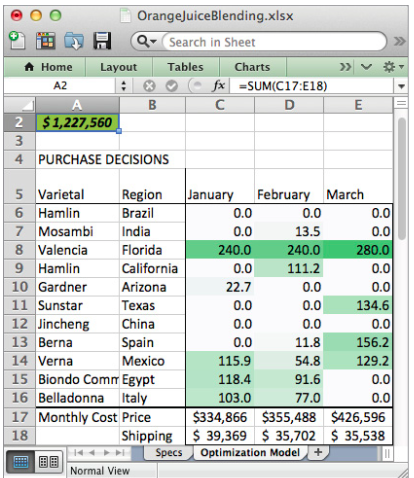

In [165]:
from IPython.display import Image
Image(filename='images/oj_blend_solution.png') 